## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("data/insurance.csv")

### Descriptive Statistics

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [7]:
df.shape

(1338, 7)

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [45]:
df.duplicated().sum()

1

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [49]:
num_cols = [x for x in df.columns if df[x].dtype != "O"]

In [50]:
num_cols

['age', 'bmi', 'children', 'expenses']

In [51]:
cat_cols = [x for x in df.columns if df[x].dtype == "O"]

In [52]:
cat_cols

['sex', 'smoker', 'region']

In [53]:
df[cat_cols].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [54]:
from scipy.stats import kurtosis, skew, stats

In [55]:
print("Summary Statistics of Medical Costs")
print(df['expenses'].describe())
print("=============================")
print(f"Skew: {skew(df['expenses'])}")
print(f"Kurtosis: {kurtosis(df['expenses'])}")

Summary Statistics of Medical Costs
count     1337.000000
mean     13279.121638
std      12110.359657
min       1121.870000
25%       4746.340000
50%       9386.160000
75%      16657.720000
max      63770.430000
Name: expenses, dtype: float64
Skew: 1.5136902470367863
Kurtosis: 1.5937433353396573


__Skewness__

As skewness is more than 1, it means we have highly right skewed expenses data.

__Kurtosis__

With a kurtosis value of 1.59 < 3, it means we have Platykurtic data, with thin tail or lack of outliers.

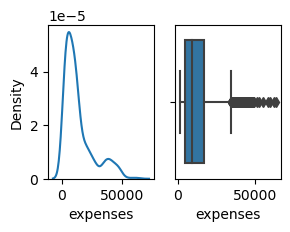

In [56]:
f, ax = plt.subplots(1,2, figsize = (3,2))
sns.kdeplot(df['expenses'], ax=ax[0])
sns.boxplot(df['expenses'], ax=ax[1])
plt.show()

Both the boxplot and kernel density plot show presence of light right tail / right skewed.

### Univariate Analysis

In [57]:
def outliers(df):
    for i in df.columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        LTV = Q1 - 1.5*IQR
        UTV = Q3 + 1.5*IQR
        x = np.array(df[i])
        outs = []
        for j in x:
            if j < LTV or j > UTV:
                outs.append(j)
        print(f"\nCount of outliers in column: {i} is {len(outs)}.\nLower Bound: {LTV}\nUpper Bound: {UTV}\nPercentage of outliers: {round(len(outs)/len(x)*100, 2)}%")

In [67]:
outliers(df[num_cols])


Count of outliers in column: age is 0.
Lower Bound: -9.0
Upper Bound: 87.0
Percentage of outliers: 0.0%

Count of outliers in column: bmi is 9.
Lower Bound: 13.699999999999998
Upper Bound: 47.300000000000004
Percentage of outliers: 0.67%

Count of outliers in column: children is 0.
Lower Bound: -3.0
Upper Bound: 5.0
Percentage of outliers: 0.0%

Count of outliers in column: expenses is 139.
Lower Bound: -13120.73
Upper Bound: 34524.79
Percentage of outliers: 10.4%


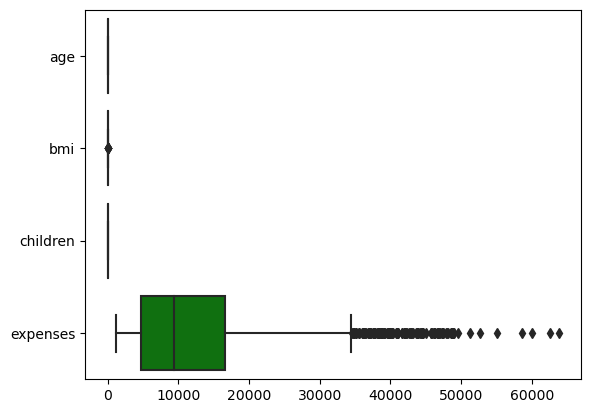

In [59]:
ax = sns.boxplot(data=df, orient='h', color='green')
plt.show()

In [60]:
df.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

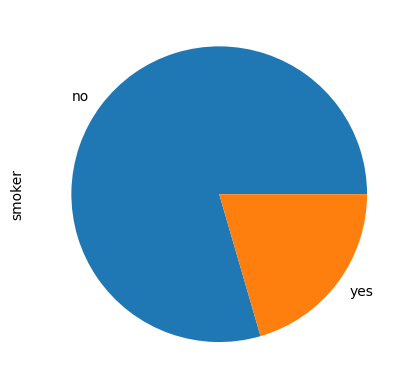

In [63]:
df.smoker.value_counts().plot(kind='pie')
plt.show()

In [61]:
df.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

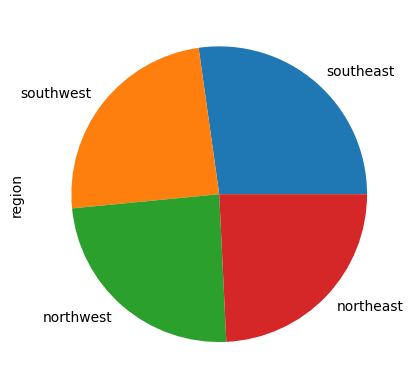

In [64]:
df.region.value_counts().plot(kind='pie')
plt.show()

In [62]:
df.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

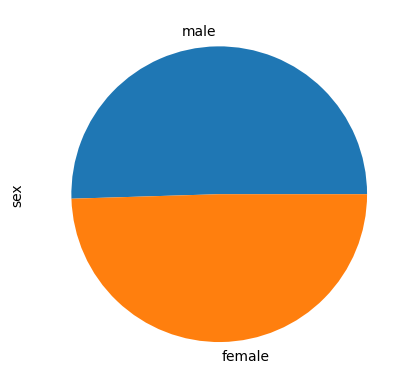

In [65]:
df.sex.value_counts().plot(kind='pie')
plt.show()

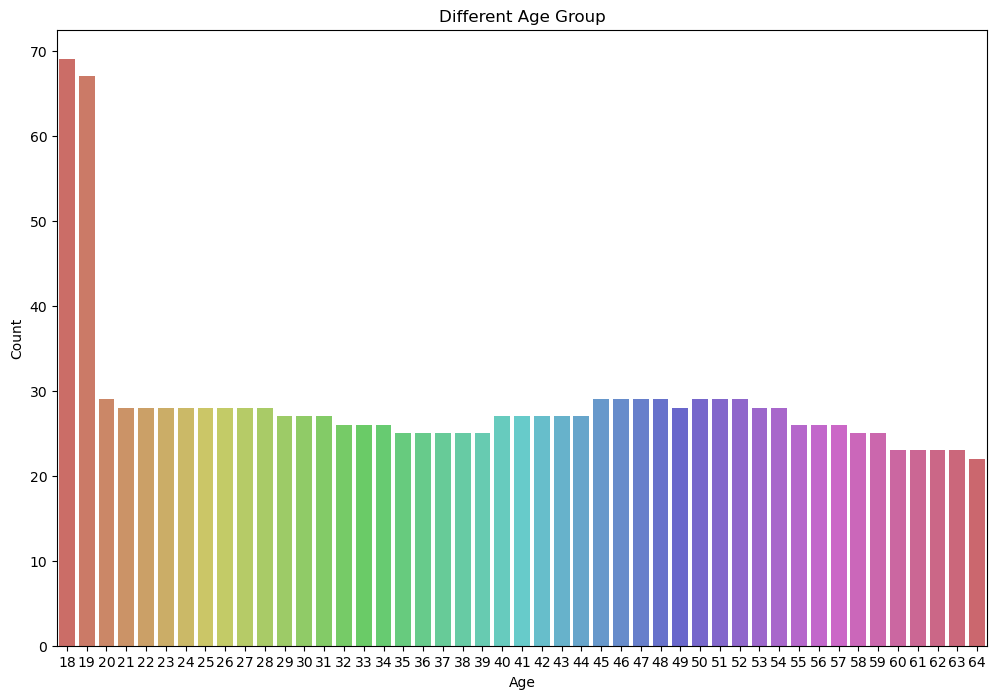

In [73]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='age', palette='hls')
plt.title("Different Age Group")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Dataset has higher occurances of teens.

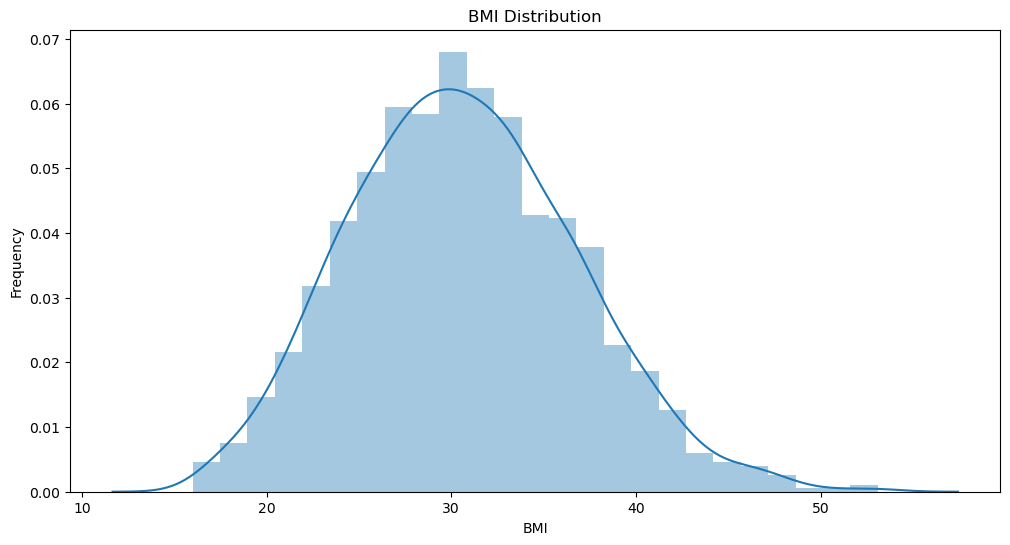

In [77]:
plt.figure(figsize=(12,6))
sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

_BMI_ follows a fairly normal distribution.

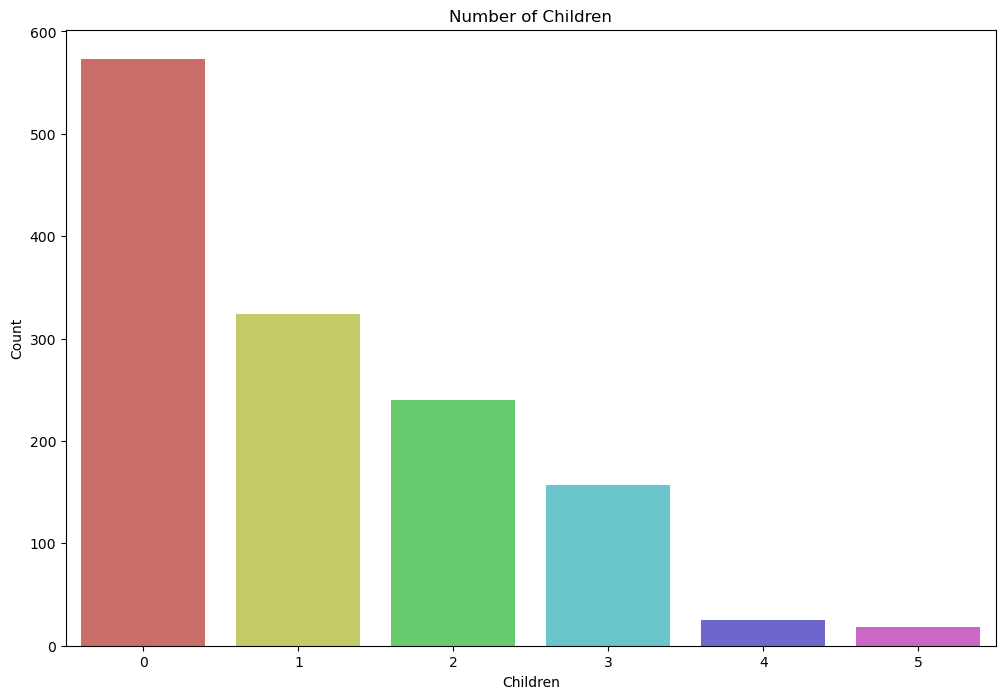

In [79]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='children', palette='hls')
plt.title("Number of Children")
plt.xlabel("Children")
plt.ylabel("Count")
plt.show()

### Bivariate Analysis

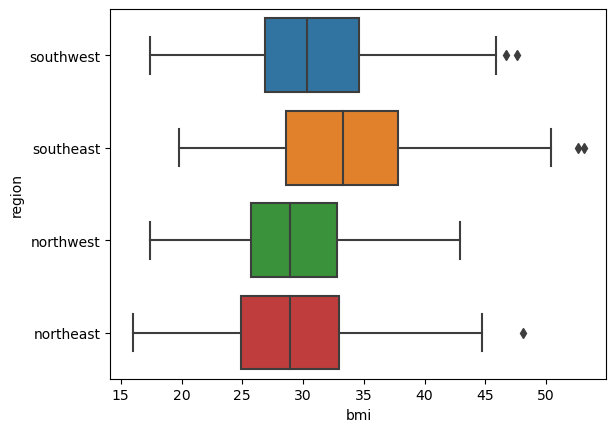

In [94]:
# plt.figure(figsize=(20,12))
sns.boxplot(x='bmi', y='region', data=df)
plt.show()

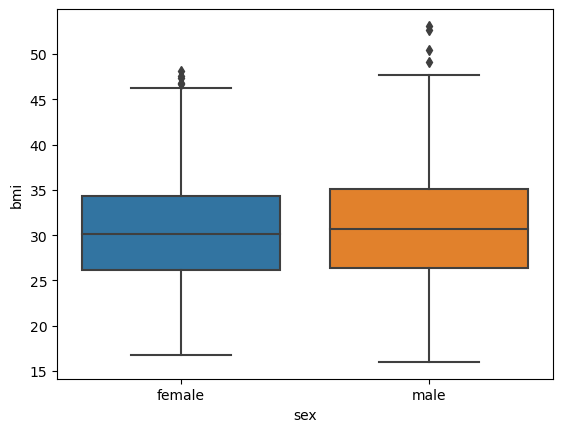

In [95]:
# plt.figure(figsize=(20,8))
sns.boxplot(x='sex', y='bmi', data=df)
plt.show()

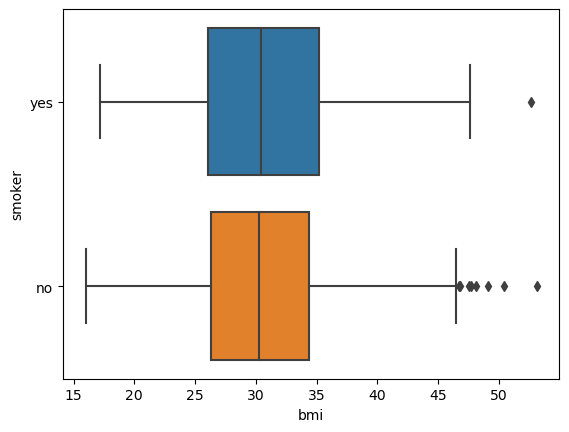

In [96]:
# plt.figure(figsize=(20,8))
sns.boxplot(x='bmi', y='smoker', data=df)
plt.show()

In [84]:
df.groupby('smoker').expenses.agg(["mean", "median", "count"])

,mean,median,count
smoker,,,
no,8440.660461,7345.73,1063
yes,32050.231971,34456.35,274


Mean Expenses for Smokers are higher than non-smokers

In [86]:
df.groupby('sex').expenses.agg(["mean", "median", "count"])

,mean,median,count
sex,,,
female,12569.578897,9412.965,662
male,13974.999111,9377.900,675


In [87]:
df.groupby('children').expenses.agg(["mean", "median", "count"])

,mean,median,count
children,,,
0,12384.695515,9863.470,573
1,12731.171821,8483.870,324
2,15073.564000,9264.980,240
3,15355.318535,10600.550,157
4,13850.656800,11033.660,25
5,8786.035556,8589.565,18


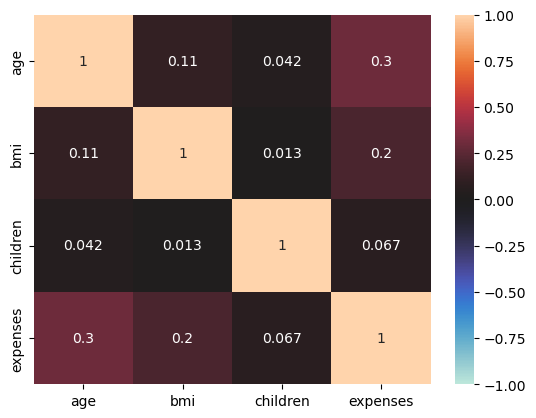

In [89]:
corr = df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True)

_age_ and _bmi_ have relationship with expenses.

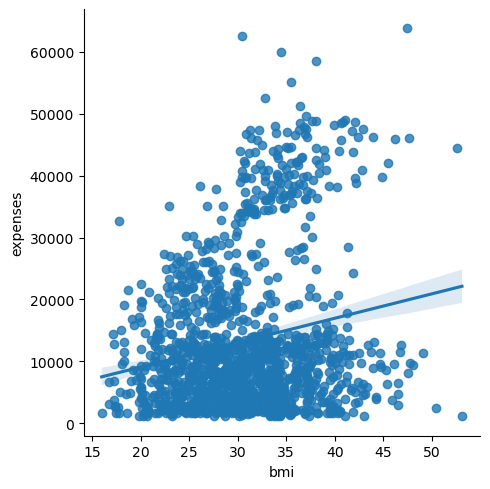

In [91]:
sns.lmplot(data=df, x='bmi', y='expenses')
plt.show()

There exists a somewhat linear relationship betweeb _bmi_ and _expenses_.

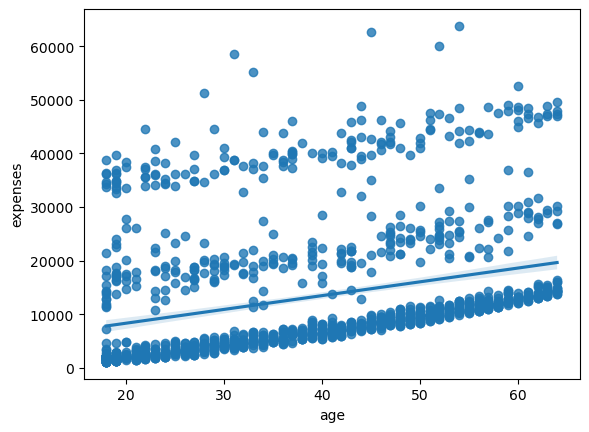

In [92]:
sns.regplot(data=df, x='age', y='expenses')
plt.show()

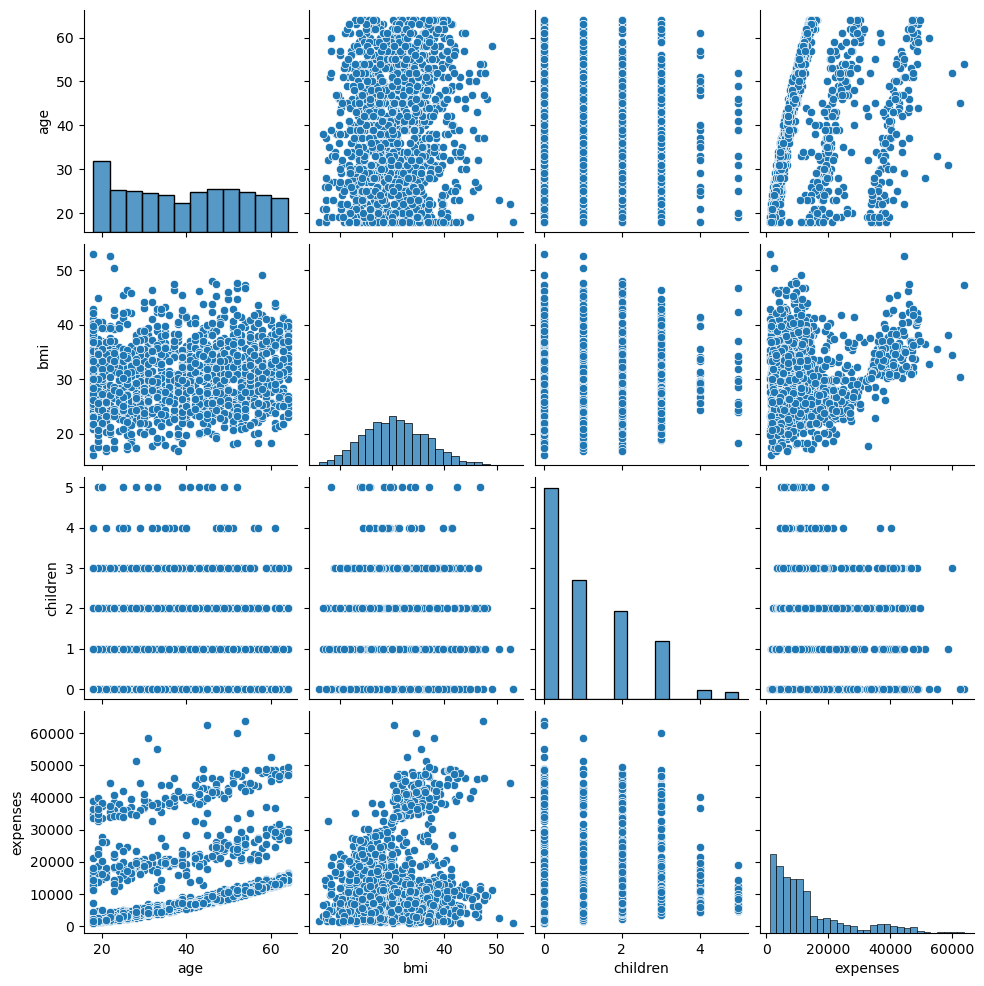

In [97]:
sns.pairplot(df)

### Multivariate Analysis

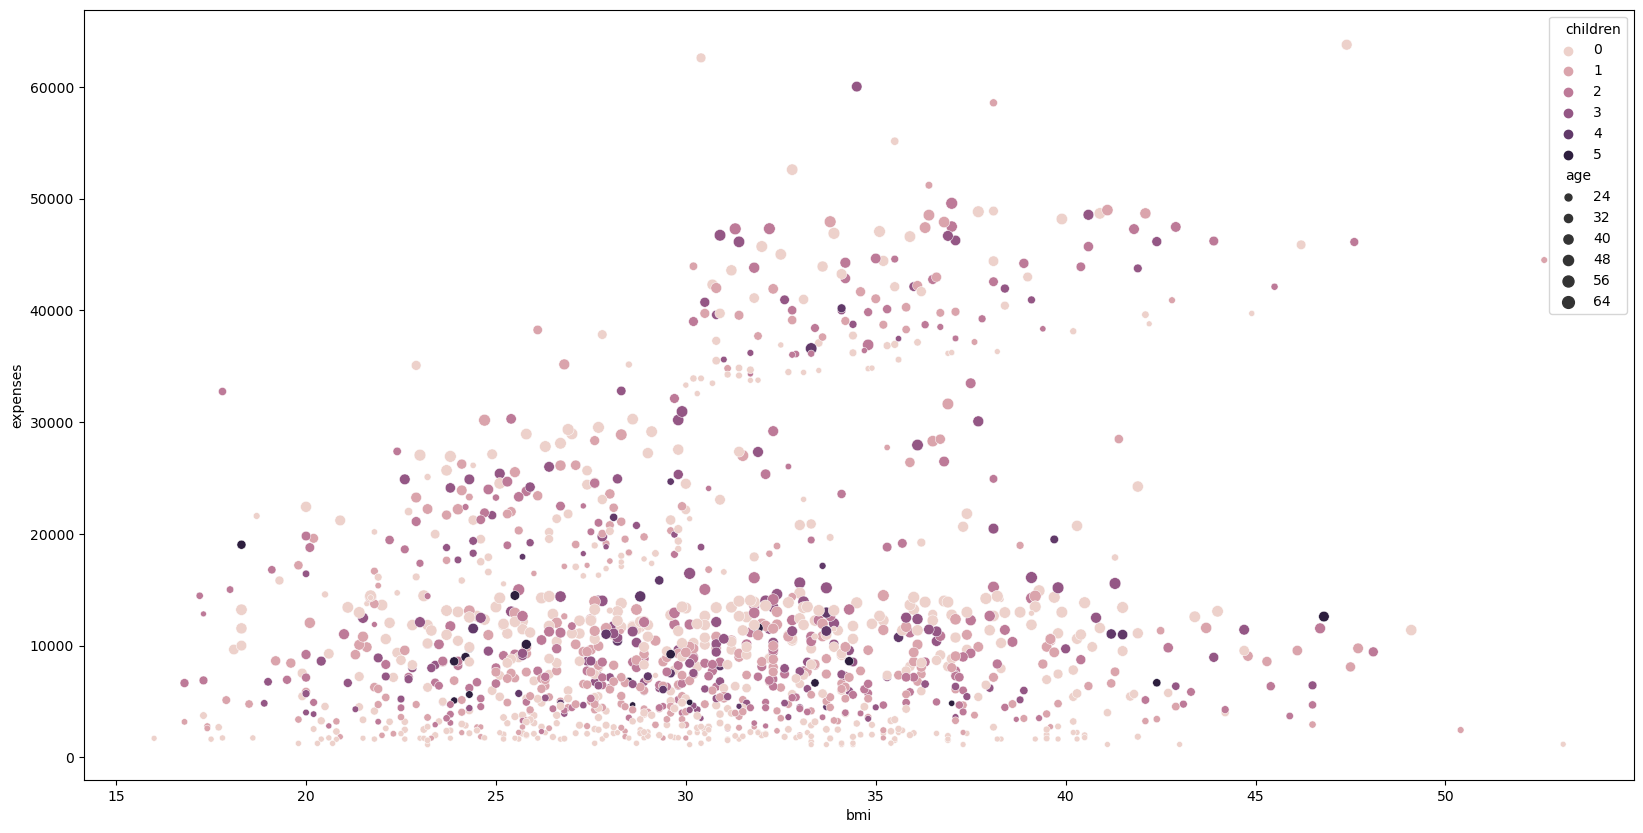

In [100]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x='bmi', y='expenses', hue='children', size='age')
plt.show()

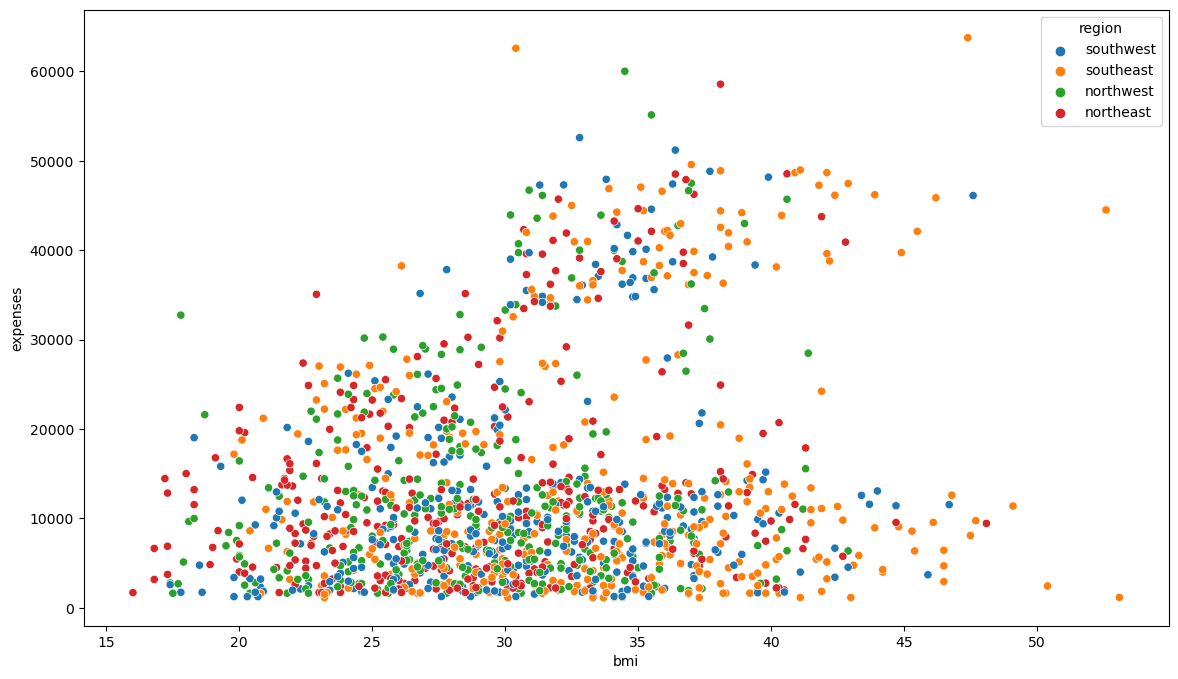

In [106]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='bmi', y='expenses', hue='region')
plt.show()

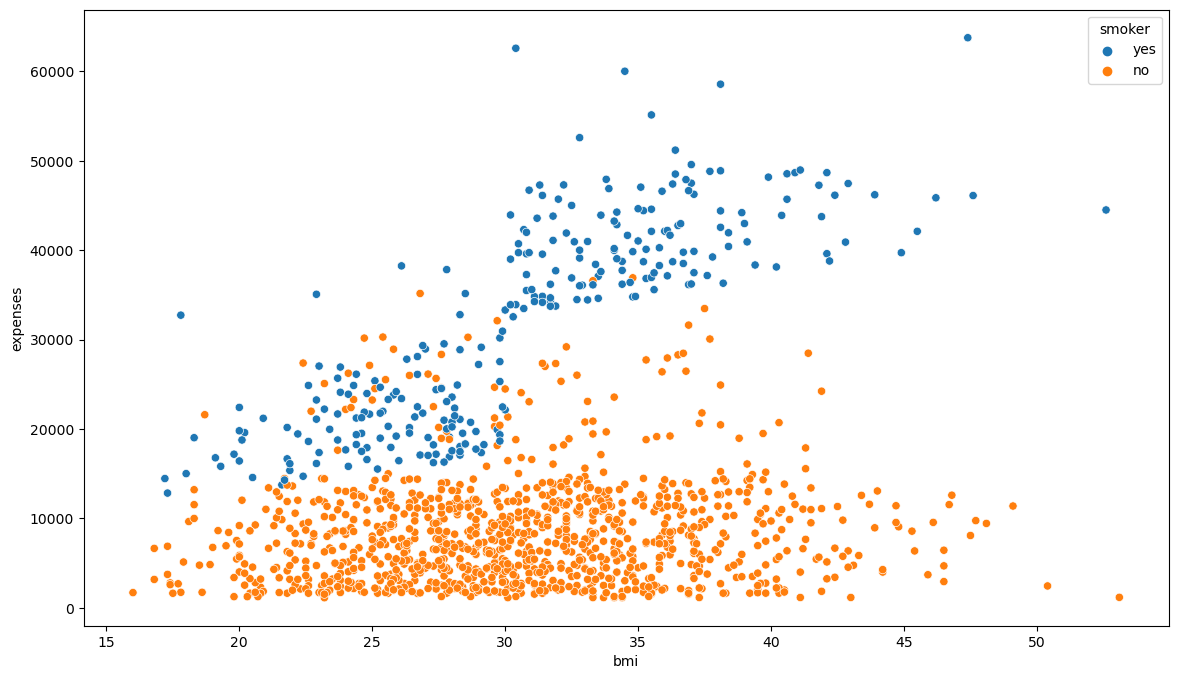

In [105]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x='bmi', y='expenses', hue='smoker')
plt.show()

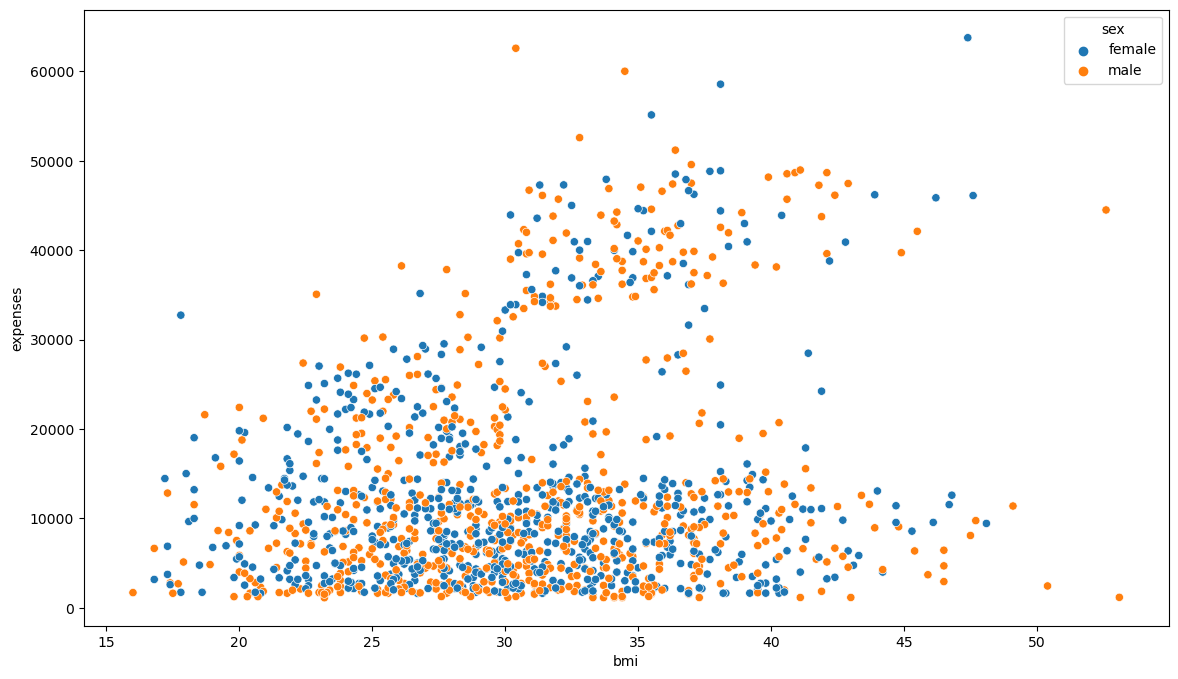

In [107]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='bmi', y='expenses', hue='sex')
plt.show()

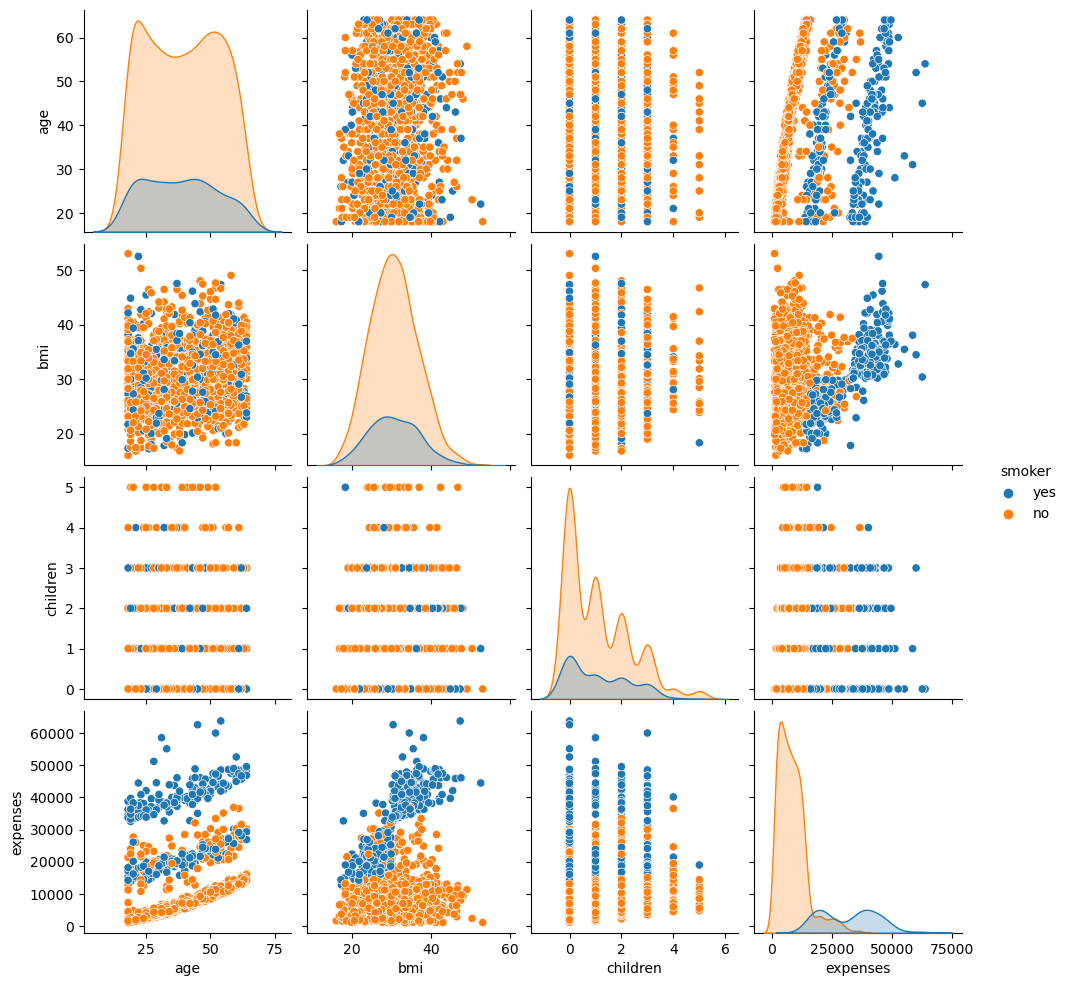

In [109]:
sns.pairplot(df, hue='smoker')

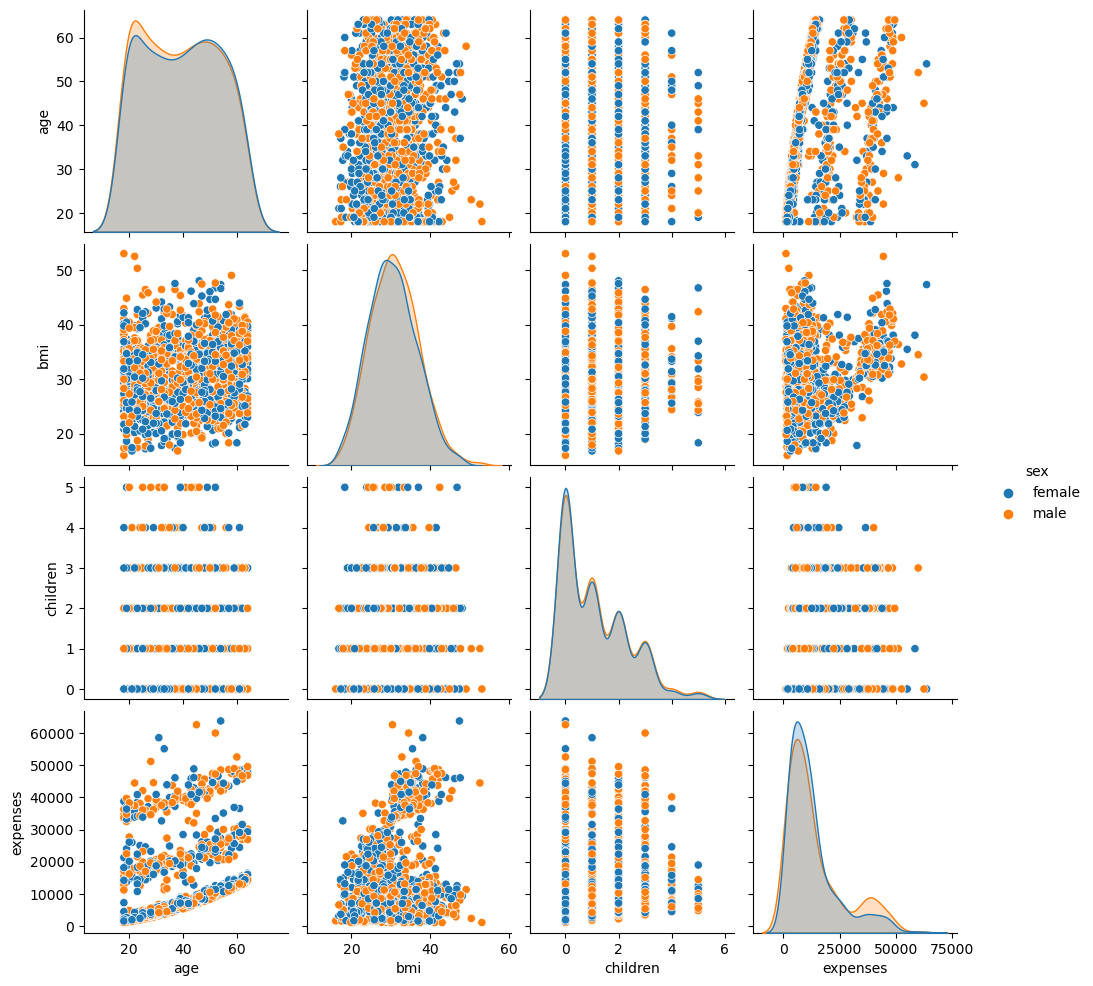

In [110]:
sns.pairplot(df, hue='sex')

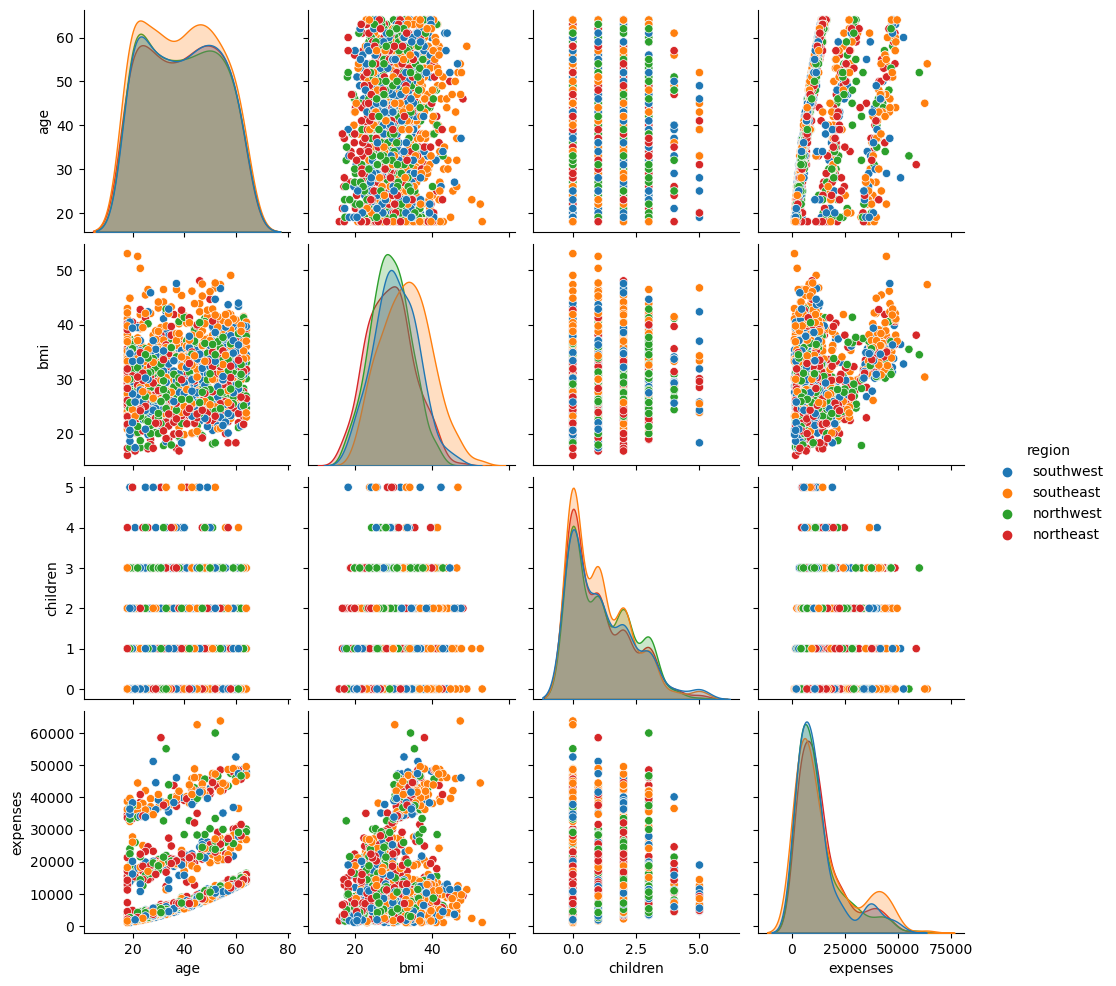

In [111]:
sns.pairplot(df, hue='region')